/tmp/ipython-input-770593501.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
/tmp/ipython-input-770593501.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

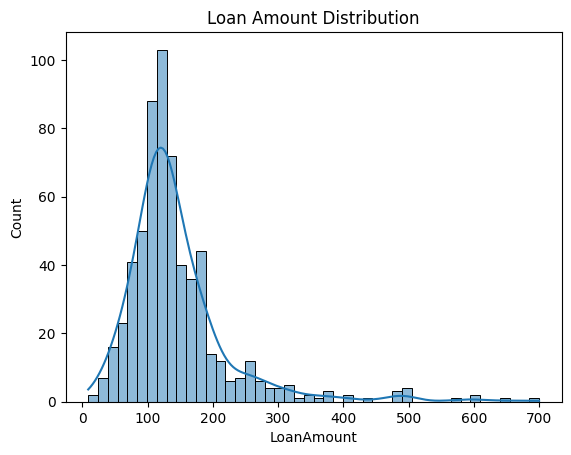

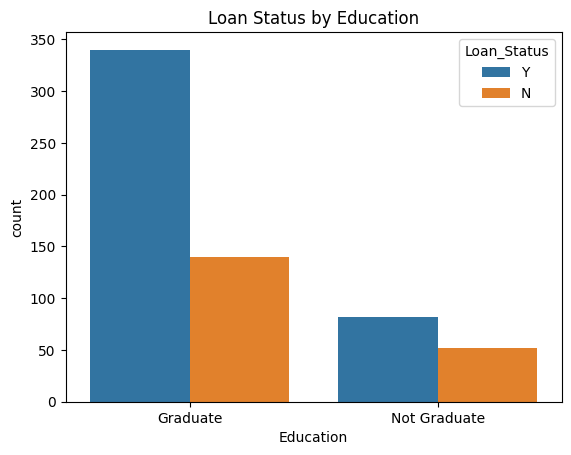

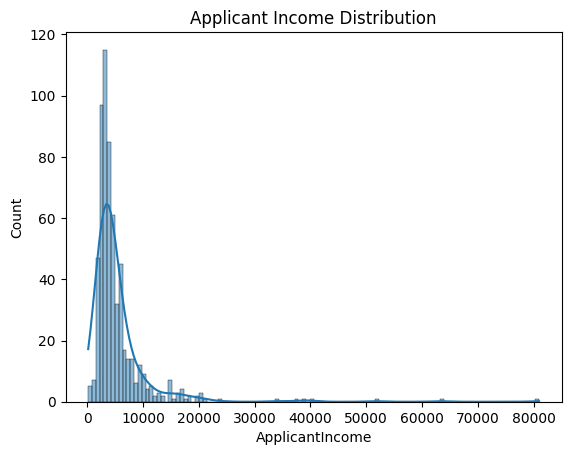

Logistic Regression Results:
Accuracy: 0.7886178861788617


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


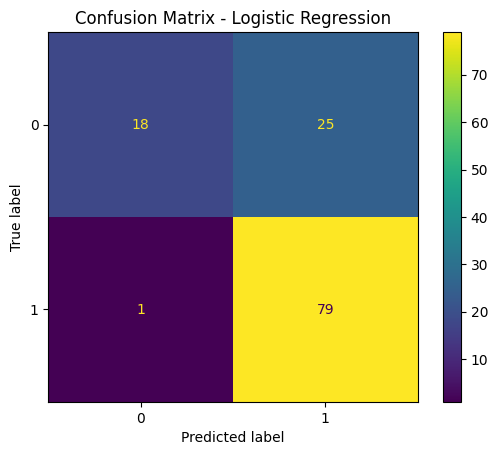

Decision Tree Results:
Accuracy: 0.6910569105691057


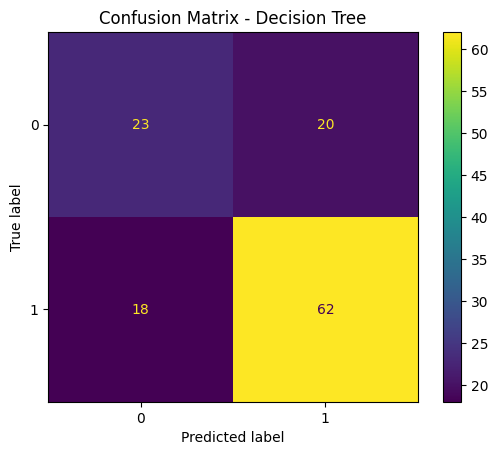

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Loading the dataset
train_df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
test_df = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")

#Drop Loan_ID as it's not useful for prediction
train_df.drop("Loan_ID", axis=1, inplace=True)
test_df.drop("Loan_ID", axis=1, inplace=True)

# Fill categorical columns with mode
cat_cols_train = train_df.select_dtypes(include='object').columns
cat_cols_test = test_df.select_dtypes(include='object').columns

# Get common categorical columns in both dataframes
common_cat_cols = list(set(cat_cols_train) & set(cat_cols_test))

for col in common_cat_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# Fill numeric columns with median
num_cols_train = train_df.select_dtypes(include=np.number).columns
num_cols_test = test_df.select_dtypes(include=np.number).columns
# Get common numeric columns in both dataframes
common_num_cols = list(set(num_cols_train) & set(num_cols_test))

for col in common_num_cols:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)

#Visualisations

# Loan Amount
sns.histplot(train_df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

# Education vs Loan Status
sns.countplot(data=train_df, x='Education', hue='Loan_Status')
plt.title('Loan Status by Education')
plt.show()

# Applicant Income
sns.histplot(train_df['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')
plt.show()

#Encode Categorical Variables
le = LabelEncoder()

# Get common categorical columns for encoding
common_cat_cols_encode = list(set(train_df.columns) & set(test_df.columns) & set(train_df.select_dtypes(include='object').columns))

for col in common_cat_cols_encode:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

#Train-Test Split (from train.csv only)

X = train_df.drop("Loan_Status", axis=1)
y = train_df["Loan_Status"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Classification Model

# Option 1: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

# Option 2: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

#Evaluate the Models

# Logistic Regression
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_lr))
cm_lr = confusion_matrix(y_val, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Decision Tree
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
cm_dt = confusion_matrix(y_val, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()